<a href="https://colab.research.google.com/github/eemim/data-analytics_hw/blob/main/Teht%C3%A4v%C3%A43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Osa 1: Viinit

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [ ]:
df_viini=pd.read_excel('wine.xlsx')
df_viini.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df_viini.shape

(178, 14)

In [ ]:
df_viini.dropna(inplace=True)

In [ ]:
df_viini.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
dtype: int64

In [ ]:
df_viini.shape
# ei tyhjiä arvoja datassa, eikä mitään pudonnut pois

(178, 14)

### HUOM!
Esimerkiksi Random Forest antoi niin hämmästyttävän hyvän tuloksen (=1.0) ja muutkin mallit melko hyviä ennusteita, joten koitettu myös datan sekoitusta ja katsottu vaikuttaako se tuloksiin.

**Lopputulos:**

Mallien testijoukkojen ennustamisen tulokset tipahtivat tällä, joten selkeästi oppimista oli saattanut tapahtua myös "väärällä" tavalla eli datan rakenteen kautta. Alkuperäisessä datassa rypälelajikkeet olivat suuruusjärjestyksessä ylhäältä alas.

Tämä johti kuitenkin eri tuloksiin aina solujen ajamisen jälkeen, joten hermojen ja ylimääräisen "ränkläämisen" säästämiseksi shuffle() otettu pois käytöstä.

In [ ]:
#df_viini=shuffle(df_viini)

In [ ]:
X = df_viini.drop(columns=['Y'])
y = df_viini['Y']

X_opetus, X_testi, y_opetus, y_testi = train_test_split(X, y, random_state=2)
X_opetus.shape

(133, 13)

## Decision Tree

In [ ]:
malli_puu = DecisionTreeClassifier(max_depth=4, random_state=2)
# max_depth > 4 ei tuonut enää merkittäviä muutoksia
malli_puu.fit(X_opetus, y_opetus)

DecisionTreeClassifier(max_depth=4, random_state=2)

### Arviointi

In [ ]:
# opetusdata
malli_puu.score(X_opetus, y_opetus)

1.0

In [ ]:
# testidata
malli_puu.score(X_testi, y_testi)

0.9555555555555556

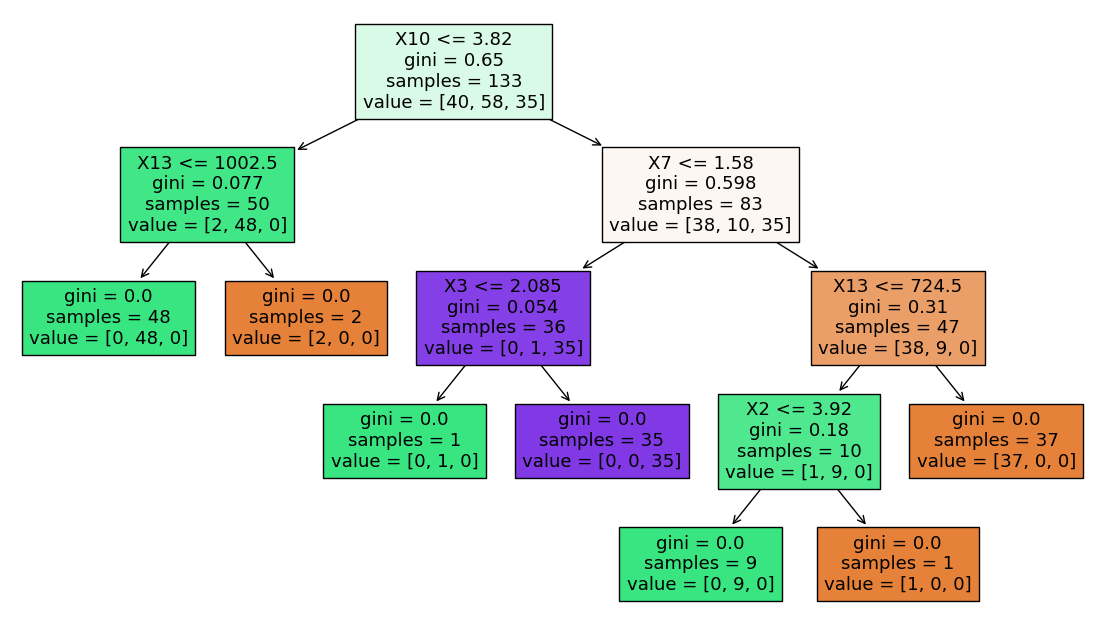

In [ ]:
# puun havainnollistaminen
plt.figure(figsize=(14,8))
plot_tree(malli_puu, filled=True, feature_names=df_viini.columns[1:])
plt.show()

Opetusdatalle ei välttämättä ole mielekästä tehdä sekaannusmatriisia, sillä siinä ei ole virheitä

Tehdään kuitenkin testidatalle:

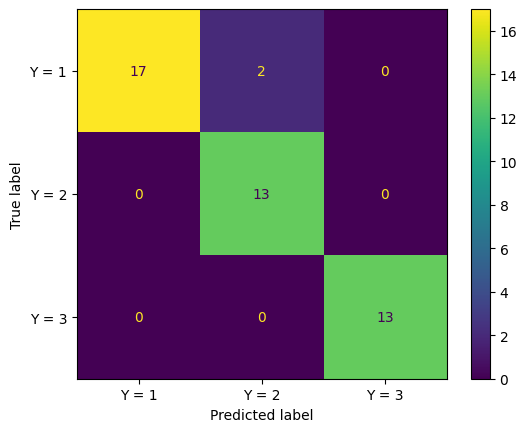

In [ ]:
# sekaannusmatriisi testidatalle

# ennusteet
y_malli_puu_testi = malli_puu.predict(X_testi)

# sekaannusmatriisi
cm = confusion_matrix(y_testi, y_malli_puu_testi)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Y = 1', 'Y = 2', 'Y = 3']).plot()

## Random Forest

In [ ]:
malli_metsa = RandomForestClassifier(max_depth=3, random_state=2)
malli_metsa.fit(X_opetus, y_opetus)

RandomForestClassifier(max_depth=3, random_state=2)

### Arviointi

In [ ]:
# opetusdata
malli_metsa.score(X_opetus, y_opetus)

1.0

In [ ]:
# testidata
malli_metsa.score(X_testi, y_testi)

1.0

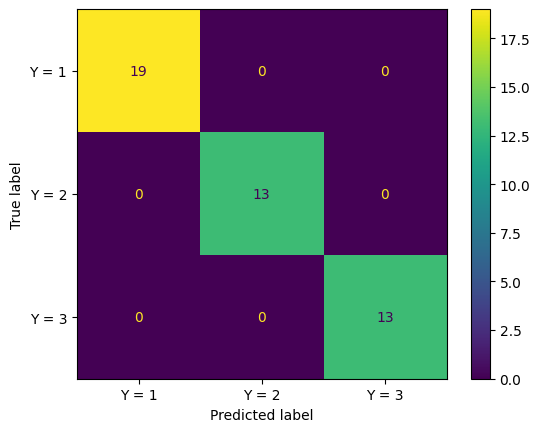

In [ ]:
# sekaannusmatriisi testidatalle

# ennusteet
y_malli_metsa_testi = malli_metsa.predict(X_testi)

# sekaannusmatriisi
cm = confusion_matrix(y_testi, y_malli_metsa_testi)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Y = 1', 'Y = 2', 'Y = 3']).plot()

Satunnaismetsä toimii hämmästyttävän hyvin datan kanssa ilman sekoitusta. Tämä saattaa johtua siitä, että malli luultavasti oppii myös datan rakenteen kautta. Sekoitusta käytettäessä virheitä oli noin 1-3 per kierros testidatalla.

## Gradient Boosting

In [ ]:
malli_grad = GradientBoostingClassifier(max_depth=4, random_state=2)
malli_grad.fit(X_opetus, y_opetus)

GradientBoostingClassifier(max_depth=4, random_state=2)

### Arviointi

In [ ]:
# opetusdata
malli_grad.score(X_opetus, y_opetus)

1.0

In [ ]:
# testidata
malli_grad.score(X_testi, y_testi)

0.9555555555555556

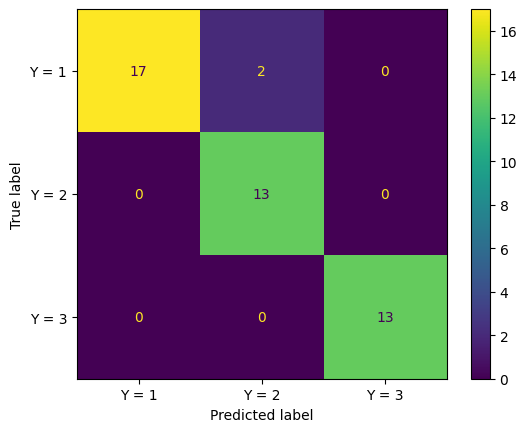

In [ ]:
# sekaannusmatriisi testidatalle

# ennusteet
y_malli_grad_testi = malli_grad.predict(X_testi)

# sekaannusmatriisi
cm = confusion_matrix(y_testi, y_malli_grad_testi)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Y = 1', 'Y = 2', 'Y = 3']).plot()

Valitut kolme mallia toimivat erittäin hyvin yksinkertaisessa ja pienehkössä datasetissä. Alla kokeiltuna nopeasti vielä K-lähimmän naapurin menetelmä, joka suoriutui selkeästi huonommin tämänkaltaisen datan kanssa.

In [ ]:
malli_knn = KNeighborsClassifier(n_neighbors=2)
malli_knn.fit(X_opetus, y_opetus)
print('Opetusdata', malli_knn.score(X_opetus, y_opetus))
print('Testidata', malli_knn.score(X_testi, y_testi))

Opetusdata 0.8872180451127819
Testidata 0.7111111111111111


## Ennustaminen malleilla

In [ ]:
# Luodaan uusi dataframe, joka noudattelee samanlaisia arvoja kuin alkuperäinen

# Haetaan arvoja sarakkeiden perusteella
min_max_values = df_viini.iloc[:, 1:].agg([min, max])

# Luodaan uudet arvot uuteen dataframeen (pienellä copilotin avustuksella)
random_data = pd.DataFrame({column: np.random.uniform(min_val, max_val, 5)
              for column, (min_val, max_val) in min_max_values.items()})

# sijoitetaan arvot samannimisiin sarakkeisiin ottamatta huomioon ennustettavaa saraketta
testi_df = random_data[df_viini.columns[1:]]
testi_df = round(testi_df, 2)
testi_df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13
0,12.01,5.71,2.81,20.91,83.96,2.17,1.06,0.63,2.18,2.29,0.82,3.84,819.57
1,11.70,3.70,2.87,28.35,140.78,3.44,2.46,0.61,1.53,1.84,0.96,3.42,1236.85
2,12.93,3.70,1.64,28.42,144.76,2.83,4.01,0.39,2.82,9.14,0.96,2.79,926.04
3,12.42,5.79,1.76,25.49,135.28,3.29,1.43,0.23,3.45,2.55,1.63,1.72,422.38
4,14.33,2.15,1.36,14.04,101.55,2.46,2.96,0.59,2.99,7.77,1.23,1.38,1403.42


In [ ]:
def ennusta(menetelma, df):
  ennuste = menetelma.predict(df)

  todnak = menetelma.predict_proba(df).round(2)

  X_ennuste = df.copy()
  X_ennuste['ennuste'] = ennuste
  for i in range(todnak.shape[1]):
        X_ennuste[str(i+1)] = todnak[:, i]
  return X_ennuste

In [ ]:
ennusta(malli_puu, testi_df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,ennuste,1,2,3
0,12.01,5.71,2.81,20.91,83.96,2.17,1.06,0.63,2.18,2.29,0.82,3.84,819.57,2,0.0,1.0,0.0
1,11.70,3.70,2.87,28.35,140.78,3.44,2.46,0.61,1.53,1.84,0.96,3.42,1236.85,1,1.0,0.0,0.0
2,12.93,3.70,1.64,28.42,144.76,2.83,4.01,0.39,2.82,9.14,0.96,2.79,926.04,1,1.0,0.0,0.0
3,12.42,5.79,1.76,25.49,135.28,3.29,1.43,0.23,3.45,2.55,1.63,1.72,422.38,2,0.0,1.0,0.0
4,14.33,2.15,1.36,14.04,101.55,2.46,2.96,0.59,2.99,7.77,1.23,1.38,1403.42,1,1.0,0.0,0.0


In [ ]:
ennusta(malli_metsa, testi_df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,ennuste,1,2,3
0,12.01,5.71,2.81,20.91,83.96,2.17,1.06,0.63,2.18,2.29,0.82,3.84,819.57,2,0.09,0.78,0.13
1,11.70,3.70,2.87,28.35,140.78,3.44,2.46,0.61,1.53,1.84,0.96,3.42,1236.85,2,0.27,0.71,0.02
2,12.93,3.70,1.64,28.42,144.76,2.83,4.01,0.39,2.82,9.14,0.96,2.79,926.04,1,0.56,0.40,0.04
3,12.42,5.79,1.76,25.49,135.28,3.29,1.43,0.23,3.45,2.55,1.63,1.72,422.38,2,0.07,0.81,0.13
4,14.33,2.15,1.36,14.04,101.55,2.46,2.96,0.59,2.99,7.77,1.23,1.38,1403.42,1,0.65,0.21,0.15


In [ ]:
ennusta(malli_grad, testi_df)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,ennuste,1,2,3
0,12.01,5.71,2.81,20.91,83.96,2.17,1.06,0.63,2.18,2.29,0.82,3.84,819.57,2,0.00,1.00,0.00
1,11.70,3.70,2.87,28.35,140.78,3.44,2.46,0.61,1.53,1.84,0.96,3.42,1236.85,1,0.86,0.08,0.06
2,12.93,3.70,1.64,28.42,144.76,2.83,4.01,0.39,2.82,9.14,0.96,2.79,926.04,1,1.00,0.00,0.00
3,12.42,5.79,1.76,25.49,135.28,3.29,1.43,0.23,3.45,2.55,1.63,1.72,422.38,2,0.00,1.00,0.00
4,14.33,2.15,1.36,14.04,101.55,2.46,2.96,0.59,2.99,7.77,1.23,1.38,1403.42,1,1.00,0.00,0.00


Ehkä yllättäen Decision Tree sekä Linear Gradient olivat ennustamisessaan selkeästi Random Forest -mallia päättäväisempiä. Toisaalta, koska Satunnaismetsä pärjäsi parhaiten oikean datan kanssa, satunnaisesti luodut arvot ovat saattaneet sekoittaa sitä. Satunnaisesti luodut luvut taas ovat osuneet paremmin huonommin pärjänneiden mallien virhemarginaaleihin (näin omin sanoin selitettynä).

# Osa 2: Energiatehokkuus

In [ ]:
df_e=pd.read_excel('ENB2012_data.xlsx')
df_e.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df_e.corr().round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.00,-0.99,-0.20,-0.87,0.83,0.00,-0.00,-0.00,0.62,0.63
X2,-0.99,1.00,0.20,0.88,-0.86,-0.00,0.00,0.00,-0.66,-0.67
X3,-0.20,0.20,1.00,-0.29,0.28,-0.00,-0.00,0.00,0.46,0.43
X4,-0.87,0.88,-0.29,1.00,-0.97,-0.00,-0.00,-0.00,-0.86,-0.86
X5,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,-0.00,0.89,0.90
X6,0.00,-0.00,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.01
X7,-0.00,0.00,-0.00,-0.00,0.00,-0.00,1.00,0.21,0.27,0.21
X8,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.21,1.00,0.09,0.05
Y1,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
Y2,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


In [ ]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [ ]:
del X, y, X_opetus, X_testi, y_opetus, y_testi

In [ ]:
# selitetään Y1

# paras selitysaste sekä opetus- että testidatalle lineaariseen regressioon saatiin
# ottamalla mukaan kaikki muuttujat (Y2:a lukuunottamatta)
X = df_e.drop(columns=['Y1', 'Y2'])
y = df_e['Y1']

X_opetus, X_testi, y_opetus, y_testi = train_test_split(X, y, random_state=2)
print(X_opetus.shape)
print(X_testi.shape)

(576, 8)
(192, 8)


## Lineaarinen regressio

In [ ]:
malli_lin = LinearRegression().fit(X_opetus, y_opetus)

In [ ]:
# selitysasteet
print('Opetusdata:', malli_lin.score(X_opetus, y_opetus))
print('Testidata:', malli_lin.score(X_testi, y_testi))

Opetusdata: 0.9153366341476468
Testidata: 0.9069730692451111


Lineaarinen regressio tuntuisi selittävän dataa melko hyvin

### Ennusteet

In [ ]:
y_malli_lin_opetus_ennuste = malli_lin.predict(X_opetus)
y_malli_lin_testi_ennuste = malli_lin.predict(X_testi)

Text(0.5, 1.0, 'Testidata, todelliset vs ennuste')

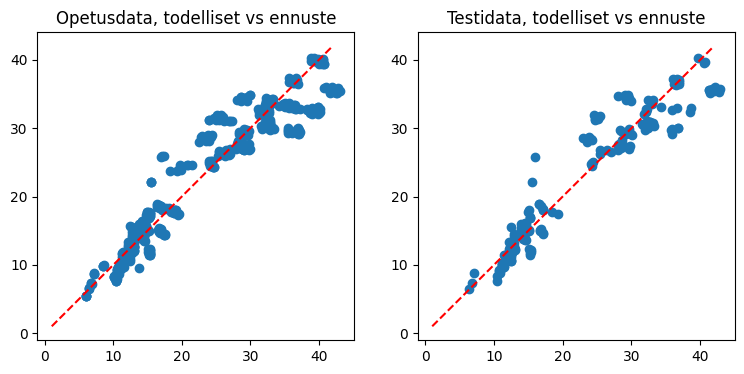

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].scatter(y_opetus, y_malli_lin_opetus_ennuste)
ax[0].plot((1,42),(1,42), 'r--')
ax[0].set_title('Opetusdata, todelliset vs ennuste')

ax[1].scatter(y_testi, y_malli_lin_testi_ennuste)
ax[1].plot((1,42),(1,42), 'r--')
ax[1].set_title('Testidata, todelliset vs ennuste')

### Virheet

In [ ]:
# virheet
virheet_malli_lin_opetus = y_opetus - y_malli_lin_opetus_ennuste
virheet_malli_lin_testi = y_testi - y_malli_lin_testi_ennuste

Text(0.5, 1.0, 'Ennustevirheet (testi)')

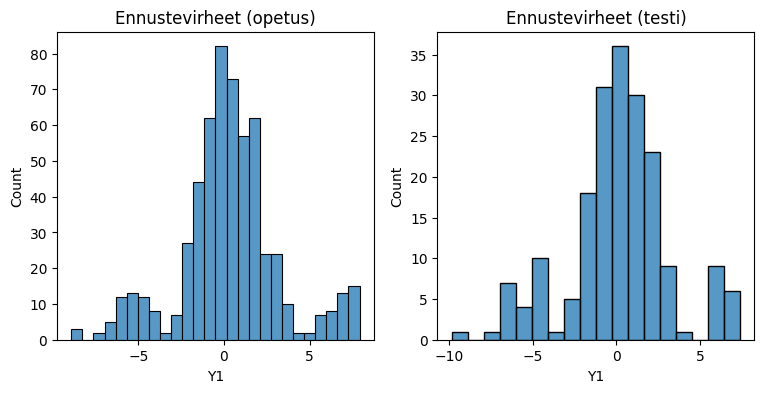

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.histplot(virheet_malli_lin_opetus, ax=ax[0])
ax[0].set_title('Ennustevirheet (opetus)')

sns.histplot(virheet_malli_lin_testi, ax=ax[1])
ax[1].set_title('Ennustevirheet (testi)')

Text(0.5, 1.0, 'Ennustevirheet (testi)')

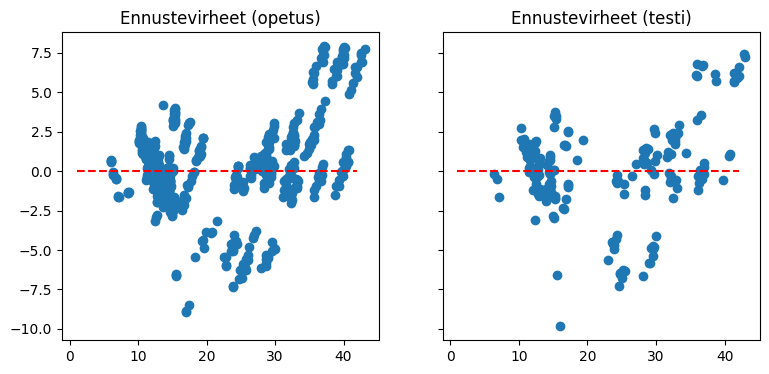

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
ax[0].scatter(y_opetus, virheet_malli_lin_opetus)
ax[0].plot([1,42],[0,0], 'r--')
ax[0].set_title('Ennustevirheet (opetus)')

ax[1].scatter(y_testi, virheet_malli_lin_testi)
ax[1].plot([1,42],[0,0], 'r--')
ax[1].set_title('Ennustevirheet (testi)')

Vaikka lineaarinen regressio antoi hyviä tuloksia, voi olla ettei se ollut tarpeeksi joustava tälle datalle

##Gradient Boosting regressio

In [ ]:
malli_gbr = GradientBoostingRegressor().fit(X_opetus, y_opetus)

In [ ]:
# selitysasteet
print('Opetusdata:', malli_gbr.score(X_opetus, y_opetus))
print('Testidata:', malli_gbr.score(X_testi, y_testi))

Opetusdata: 0.9982224613652553
Testidata: 0.9975840410229994


Gradient Boosting selittää datan lähes täydellisesti. Pidetään siis muuttujatkin samana kuin lineaarisessa regressiossa.

### Ennusteet

In [ ]:
y_malli_gbr_opetus_ennuste = malli_gbr.predict(X_opetus)
y_malli_gbr_testi_ennuste = malli_gbr.predict(X_testi)

Text(0.5, 1.0, 'Testidata, todelliset vs ennuste')

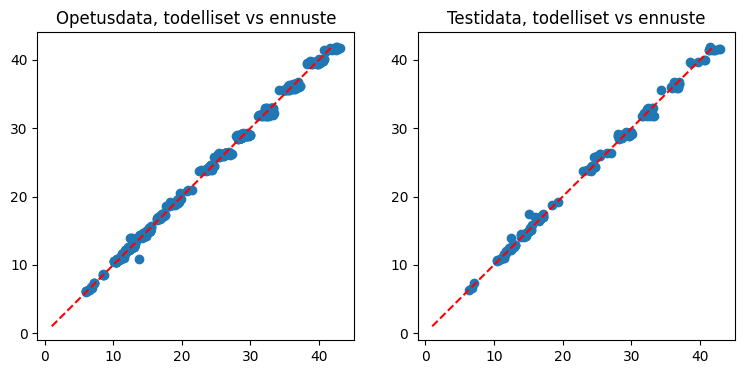

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].scatter(y_opetus, y_malli_gbr_opetus_ennuste)
ax[0].plot((1,42),(1,42), 'r--')
ax[0].set_title('Opetusdata, todelliset vs ennuste')

ax[1].scatter(y_testi, y_malli_gbr_testi_ennuste)
ax[1].plot((1,42),(1,42), 'r--')
ax[1].set_title('Testidata, todelliset vs ennuste')

### Virheet

In [ ]:
# virheet
virheet_malli_gbr_opetus = y_opetus - y_malli_gbr_opetus_ennuste
virheet_malli_gbr_testi = y_testi - y_malli_gbr_testi_ennuste

Text(0.5, 1.0, 'Ennustevirheet (testi)')

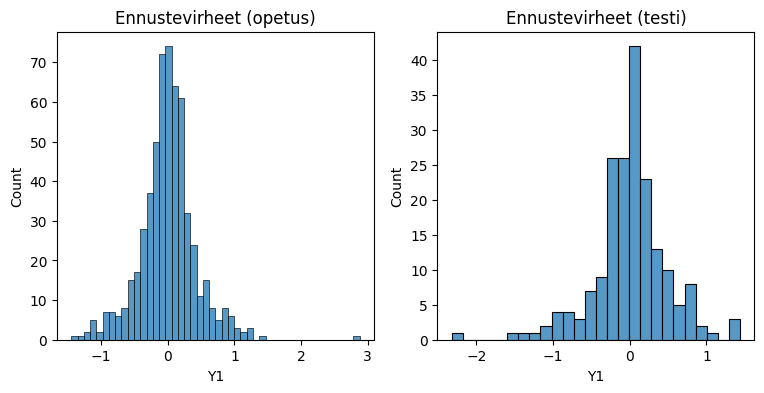

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

sns.histplot(virheet_malli_gbr_opetus, ax=ax[0])
ax[0].set_title('Ennustevirheet (opetus)')

sns.histplot(virheet_malli_gbr_testi, ax=ax[1])
ax[1].set_title('Ennustevirheet (testi)')

Hajontavirheet ovat huomattavasti pienempiä kuin lineaarisessa regressiossa.

Text(0.5, 1.0, 'Ennustevirheet (testi)')

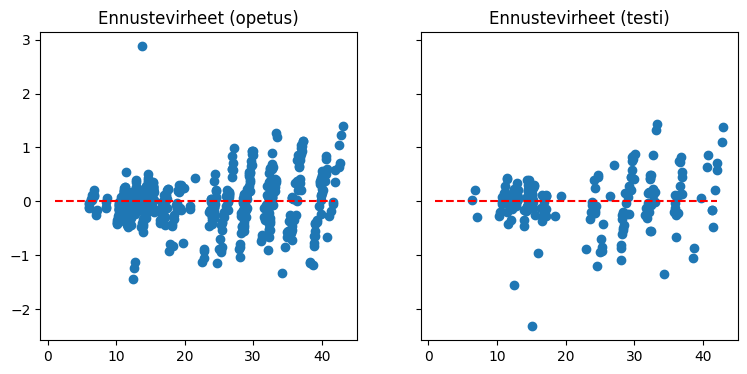

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4), sharey=True)
ax[0].scatter(y_opetus, virheet_malli_gbr_opetus)
ax[0].plot([1,42],[0,0], 'r--')
ax[0].set_title('Ennustevirheet (opetus)')

ax[1].scatter(y_testi, virheet_malli_gbr_testi)
ax[1].plot([1,42],[0,0], 'r--')
ax[1].set_title('Ennustevirheet (testi)')

Gradient Boosting regressio osui niin nappiin ennustuksella (lähes 100 testidatassa), joten muiden mallien testaaminen ei luultavasti tule tarpeeseen.